# Predicting Deposit Rate after a marketing Campaign

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
mpl.style.use('ggplot')

In [100]:
# Data loading
df = pd.read_csv(r"C:\Users\TEMITOPE AKANDE\Desktop\FULL STACK DATA SCIENCE - 10ALYTICS\Capstone Project\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [101]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [102]:
df.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [103]:
# Renaming the column heads for better understanding
df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'prevous_campaign_days',
       'previous', 'previous_campaign_outcome', 'deposit']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,prevous_campaign_days,previous,previous_campaign_outcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [104]:
df.shape

(45211, 17)

In [105]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'prevous_campaign_days', 'previous', 'previous_campaign_outcome',
       'deposit'],
      dtype='object')

In [106]:
df.info()

df['duration'] = pd.to_datetime(df['duration'], unit='h')
df["year"] = df["duration"].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   default                    45211 non-null  object
 5   balance                    45211 non-null  int64 
 6   housing                    45211 non-null  object
 7   loan                       45211 non-null  object
 8   contact                    45211 non-null  object
 9   day                        45211 non-null  int64 
 10  month                      45211 non-null  object
 11  duration                   45211 non-null  int64 
 12  campaign                   45211 non-null  int64 
 13  prevous_campaign_days      45211 non-null  int64 
 14  previo

In [107]:
#Numerical Analysis
df.describe() 

,age,balance,day,campaign,prevous_campaign_days,previous,year
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323,1970.0
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441,0.0
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000,1970.0
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000,1970.0
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000,1970.0
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000,1970.0
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000,1970.0


##### From the numerical analysis above, the dataset has a minimum age of 18 and maximum age of 95 with a mean of 40, Q1 =33, Q2=39,Q3=48. The campaign took place in the year 1970.

In [108]:
# Categorical statistical Analysis
df.describe(include=["object", "bool"])

,job,marital,education,default,housing,loan,contact,month,previous_campaign_outcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


age                          0
job                          0
marital                      0
education                    0
default                      0
balance                      0
housing                      0
loan                         0
contact                      0
day                          0
month                        0
duration                     0
campaign                     0
prevous_campaign_days        0
previous                     0
previous_campaign_outcome    0
deposit                      0
year                         0
dtype: int64


<AxesSubplot:>

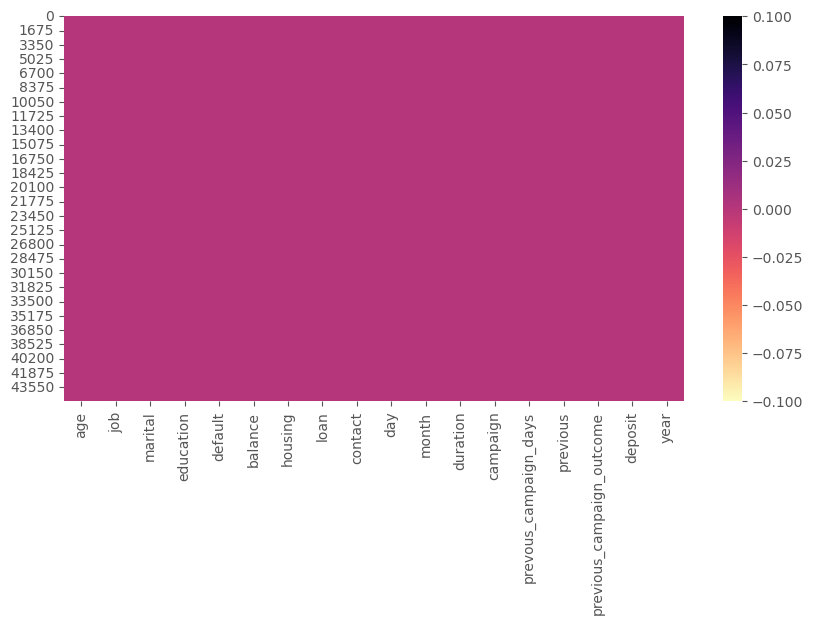

In [109]:
print(df.isnull().sum())

plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar = True, cmap = "magma_r")

#### The dataset has no empty value space( no null value) as such aiding data cleaning process.

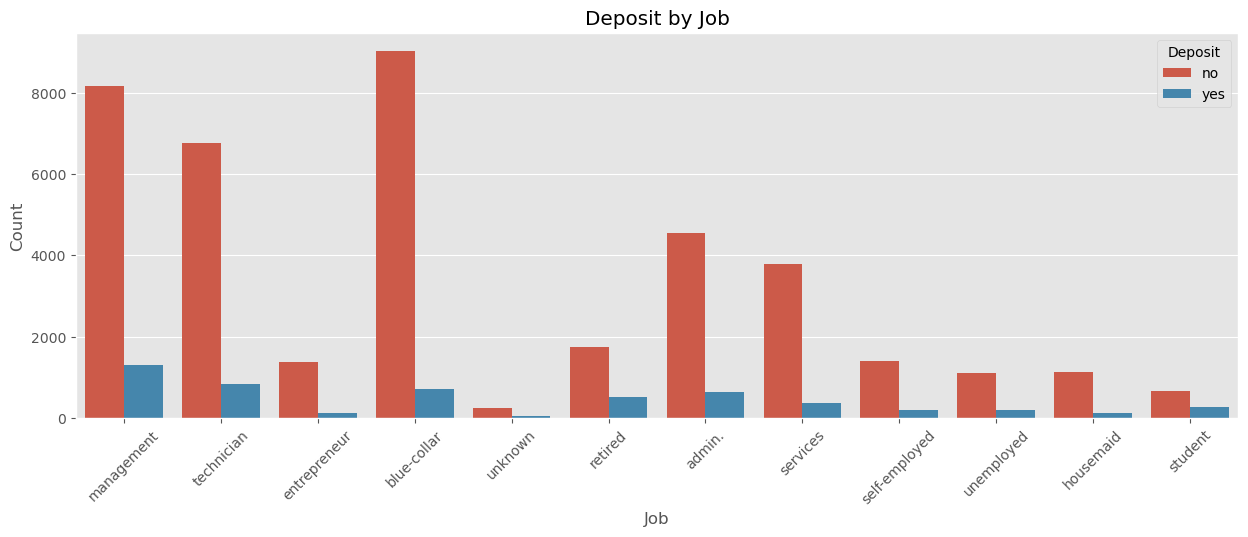

In [110]:
# Visualization between 'deposit' and 'job'

plt.figure(figsize=(15, 5))
sns.countplot(x='job', hue='deposit', data=df)
plt.title('Deposit by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit', loc='upper right')
plt.show()

##### The above visualization depicted that clients with job role management had a deposit rate compared to other to job roles, while the housemaid job role had the least deposit after the campaign.

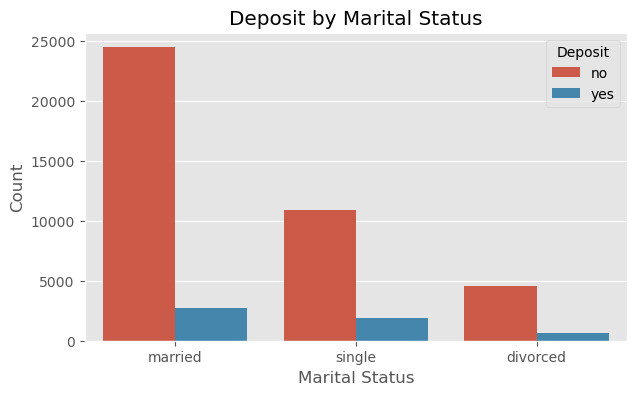

In [111]:
# Visualization between 'deposit' and 'marital'
plt.figure(figsize=(7, 4))
sns.countplot(x='marital', hue='deposit', data=df)
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()


#### Married clients are succeptible to making deposits, followed by singles while the divorced category are less likely to make deposits.

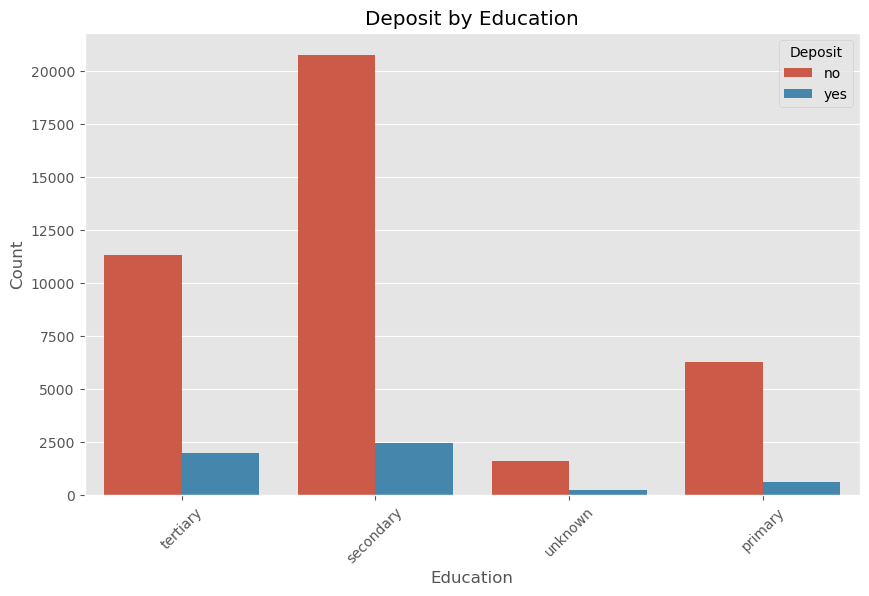

In [112]:
# Visualization between 'deposit' and 'education'
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='deposit', data=df)
plt.title('Deposit by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit', loc='upper right')
plt.show()



##### Though the class of clients with secondary education demostrated with highest tendency of not making deposit, ironically they have the highest rate of deposit while seconded by the clients with tertiary education.

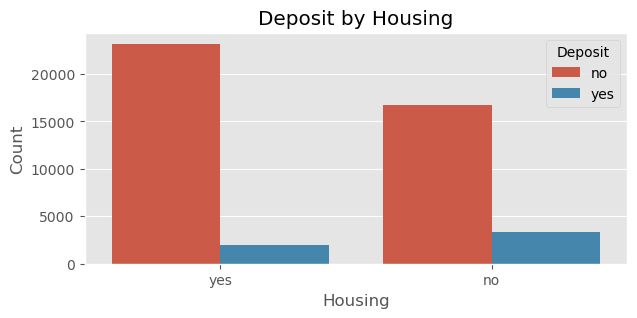

In [113]:
# Visualization between 'deposit' and 'housing'
plt.figure(figsize=(7, 3))
sns.countplot(x='housing', hue='deposit', data=df)
plt.title('Deposit by Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()



##### Clients without housing loan demostrate have better deposit tendency.

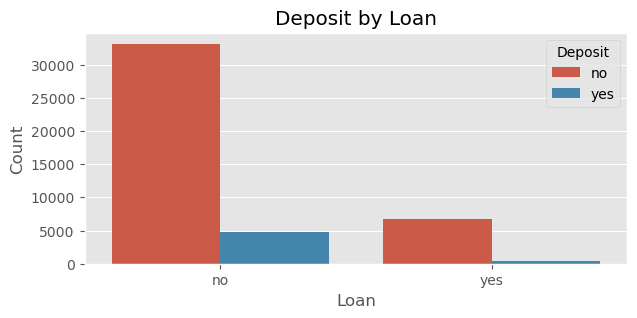

In [114]:
# Visualization between 'deposit' and 'loan'
plt.figure(figsize=(7, 3))
sns.countplot(x='loan', hue='deposit', data=df)
plt.title('Deposit by Loan')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

##### Also clients who are not in any other form of loaning have better chances of making deposit after the campaign.

In [115]:
# Group cutomer age 


def age_group(x):
    if x <= 25:
        return "Young Adult"
    elif x <= 40:
        return "Adult"
    elif x <= 55:
        return "Old Adult"
    else:
        return "Elders"
    
df["age_group"] = df["age"].apply(age_group)
df.head(3)
    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,prevous_campaign_days,previous,previous_campaign_outcome,deposit,year,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1970-01-11 21:00:00,1,-1,0,unknown,no,1970,Elders
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1970-01-07 07:00:00,1,-1,0,unknown,no,1970,Old Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1970-01-04 04:00:00,1,-1,0,unknown,no,1970,Adult


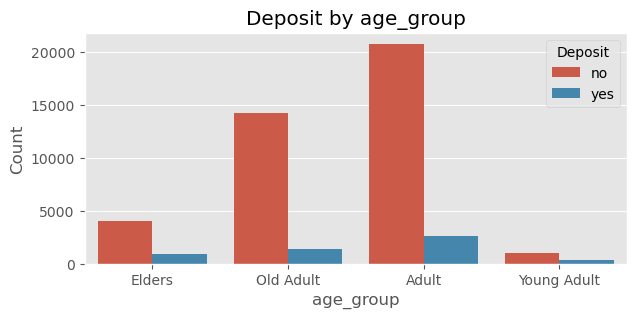

In [116]:
# Visualization between 'deposit' and 'Age_Group'
plt.figure(figsize=(7, 3))
sns.countplot(x='age_group', hue='deposit', data=df)
plt.title('Deposit by age_group')
plt.xlabel('age_group')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

##### Clients in the Adult category makes more deposit than the other age group.

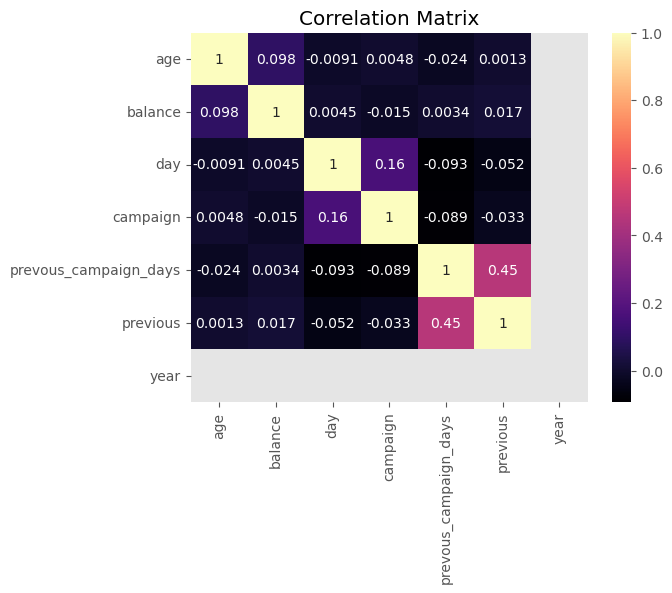

In [117]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

In [118]:
# Converting  categorical variables to numerical 
df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,prevous_campaign_days,previous,previous_campaign_outcome,deposit,year,age_group
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1970-01-11 21:00:00,1,-1,0,unknown,0,1970,Elders
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1970-01-07 07:00:00,1,-1,0,unknown,0,1970,Old Adult
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1970-01-04 04:00:00,1,-1,0,unknown,0,1970,Adult
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1970-01-04 20:00:00,1,-1,0,unknown,0,1970,Old Adult
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1970-01-09 06:00:00,1,-1,0,unknown,0,1970,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,1970-02-10 17:00:00,3,-1,0,unknown,1,1970,Old Adult
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,1970-01-20 00:00:00,2,-1,0,unknown,1,1970,Elders
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1970-02-16 23:00:00,5,184,3,success,1,1970,Elders
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,1970-01-22 04:00:00,4,-1,0,unknown,0,1970,Elders


##### This involves mapping or converting variables(booleans) in default, housing, loan and deposit columns to numerical variables

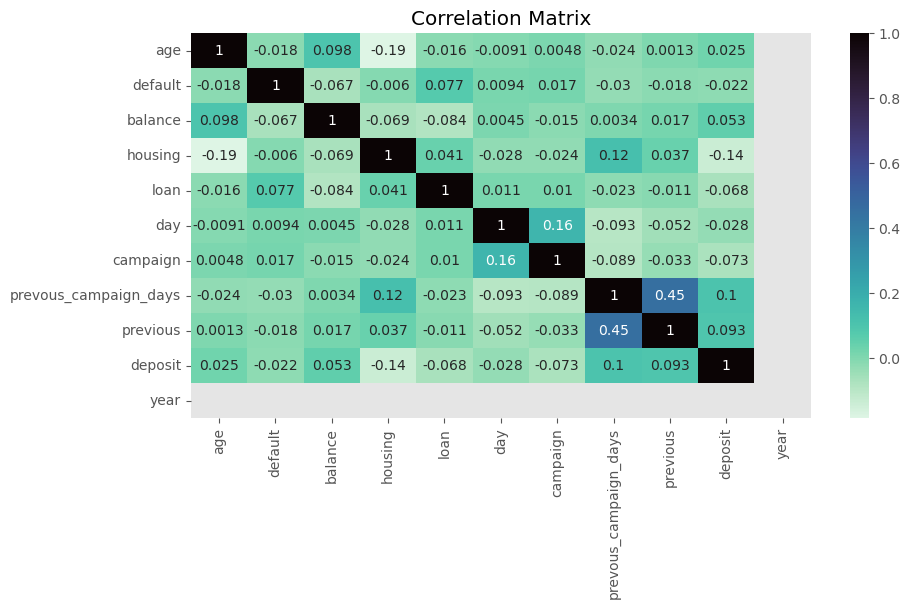

In [119]:
plt.figure(figsize = (10,5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='mako_r')
plt.title('Correlation Matrix')
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        45211 non-null  int64         
 1   job                        45211 non-null  object        
 2   marital                    45211 non-null  object        
 3   education                  45211 non-null  object        
 4   default                    45211 non-null  int64         
 5   balance                    45211 non-null  int64         
 6   housing                    45211 non-null  int64         
 7   loan                       45211 non-null  int64         
 8   contact                    45211 non-null  object        
 9   day                        45211 non-null  int64         
 10  month                      45211 non-null  object        
 11  duration                   45211 non-null  datetime64[ns]
 12  camp

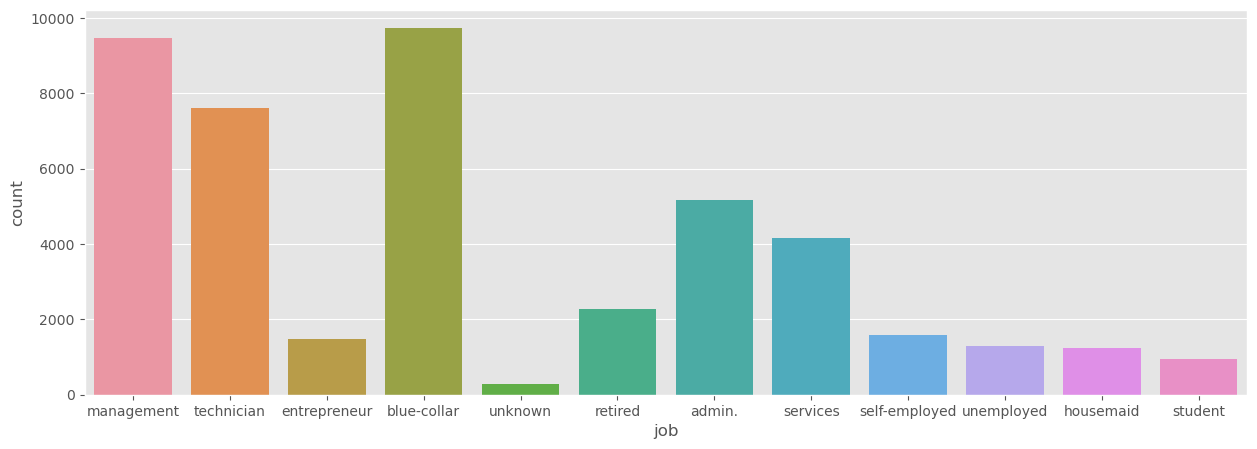

In [121]:
plt.figure(figsize=(15,5))

df["job"].value_counts()
sns.countplot(x="job", data=df)
df["job"].value_counts();

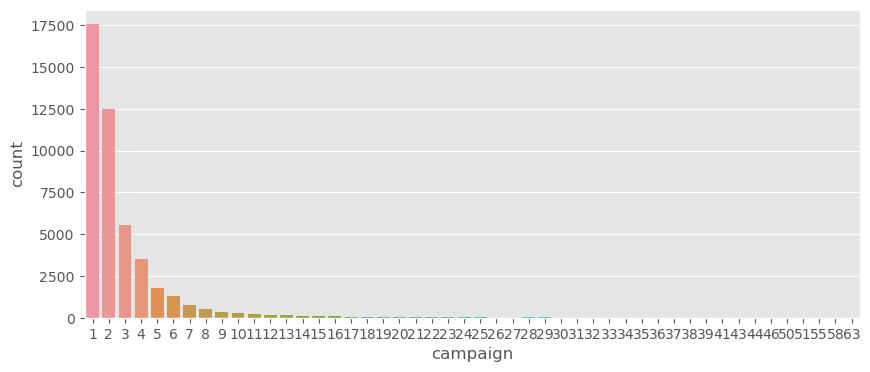

In [122]:
plt.figure(figsize =(10,4))
df["campaign"].value_counts()
sns.countplot(x="campaign", data=df)
df["campaign"].value_counts();

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

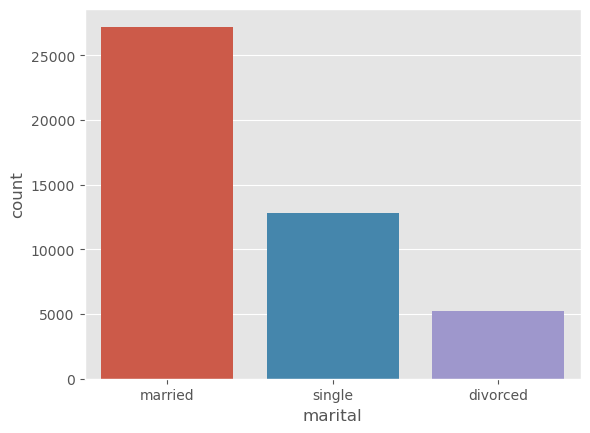

In [123]:
sns.countplot(x="marital", data=df);
df["marital"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

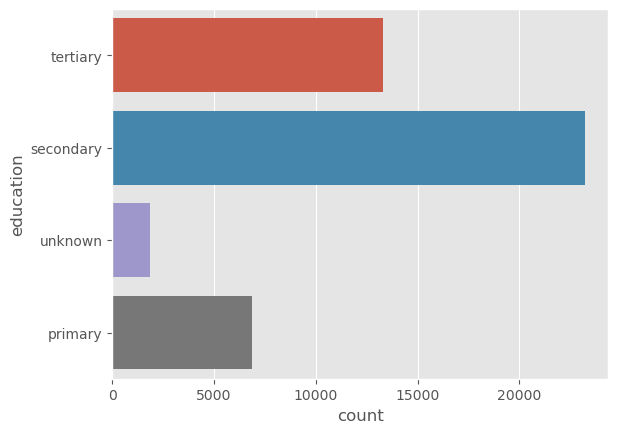

In [124]:
sns.countplot(y="education", data=df);
df["education"].value_counts()

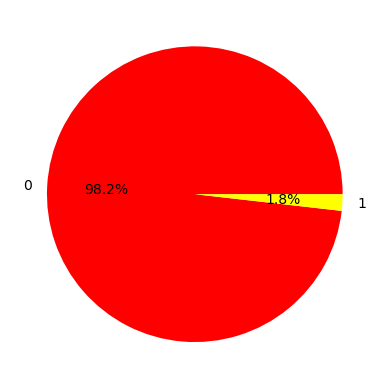

In [125]:
labels = df['default'].unique()
values = df['default'].value_counts()
plt.pie(values,labels=labels, colors=['red','yellow','green'],autopct ='%1.1f%%' )
plt.show()

##### 98% of the clients are not defaulting on their loans, while 2% are defaulter

<AxesSubplot:xlabel='month', ylabel='count'>

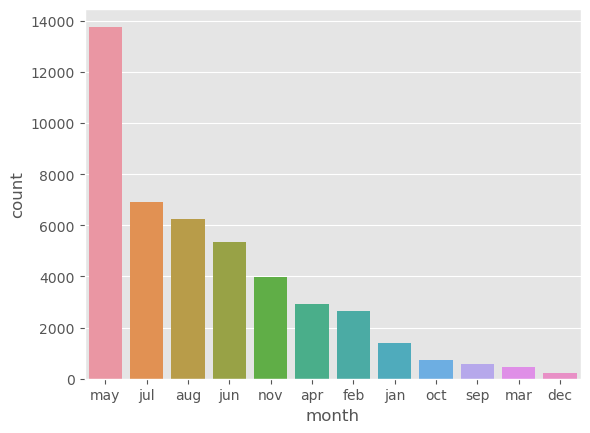

In [126]:
sns.countplot(x=df["month"], order=df["month"].value_counts(ascending=False).index)


##### The month of May has the highest campaign rate, while December represent the lowest campaign month.

Text(0.5, 1.0, 'Total number of deposits')

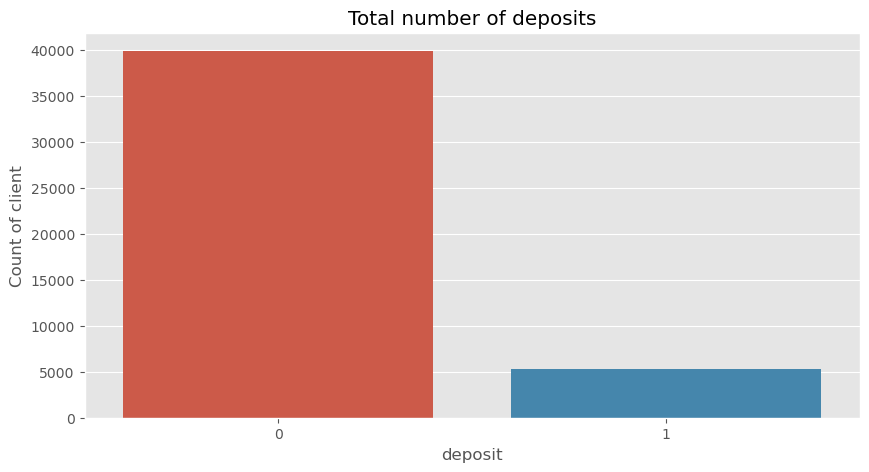

In [127]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'deposit', data=df)
plt.xlabel('deposit')
plt.ylabel('Count of client')
plt.title('Total number of deposits')

### Data Preprocessing

In [128]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'prevous_campaign_days', 'previous', 'previous_campaign_outcome',
       'deposit', 'year', 'age_group'],
      dtype='object')

In [129]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'prevous_campaign_days', 'previous', 'previous_campaign_outcome',]]

label = df[['deposit']]

In [130]:
df1.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,prevous_campaign_days,previous,previous_campaign_outcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1970-01-11 21:00:00,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1970-01-07 07:00:00,1,-1,0,unknown


In [131]:
label.head(2)

,deposit
0,0
1,0


In [132]:
df1.dtypes

age                                   int64
job                                  object
marital                              object
education                            object
default                               int64
balance                               int64
housing                               int64
loan                                  int64
contact                              object
day                                   int64
month                                object
duration                     datetime64[ns]
campaign                              int64
prevous_campaign_days                 int64
previous                              int64
previous_campaign_outcome            object
dtype: object

### Machine Learning

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,label,test_size=0.2)

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [135]:
ohe=OneHotEncoder()
ohe.fit(df1[['job','marital','education','contact','month','duration','previous_campaign_outcome']])

OneHotEncoder()

In [136]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['job','marital','education','contact','month','duration','previous_campaign_outcome']),
                                    remainder='passthrough')

In [137]:
#ohe.categories_

## Model Building

### Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
lr=LinearRegression()

In [140]:
pipe=make_pipeline(column_trans,lr)

In [141]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object),
                                                                            array(['divorced', 'married', 'single'], dtype=ob...
       '1970-01-01T02:00:00.000000000', ...,
       '1970-06-07T17:00:00.000000000', '1970-06-11T17:00:00.000000000',
       '1970-07-24T22:00:00.000000000'], dtype='datetime64[ns]'),
                                                                            array(['failure', 'other', 'success', 'unknown'], dtype=object)]),
                                                  ['job', 'marital',
                                       

In [142]:
y_pred=pipe.predict(X_test)

In [143]:
y_pred

array([[-0.04390811],
       [ 0.1641622 ],
       [ 0.44043984],
       ...,
       [ 0.08233337],
       [ 0.49735244],
       [ 0.90054309]])

In [144]:
r2_score(y_test,y_pred)

0.2647665054218533